<a href="https://colab.research.google.com/github/PrasannaKumarKB/Speciallab/blob/main/Social_Media_User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

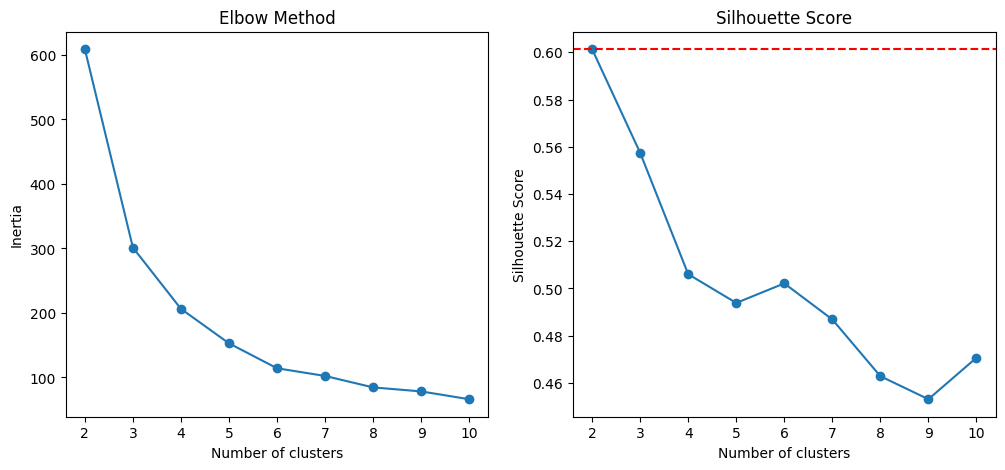

Optimal number of clusters: 2


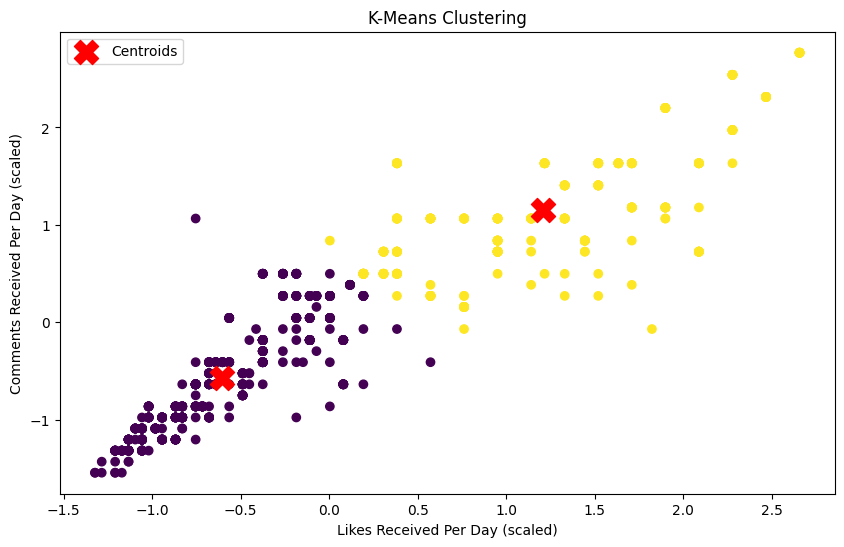

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv('train.csv')

features = ['Likes_Received_Per_Day', 'Comments_Received_Per_Day']

data = data.dropna(subset=features)

X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.axhline(y=max(silhouette_scores), color='r', linestyle='--')
plt.show()

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Likes Received Per Day (scaled)')
plt.ylabel('Comments Received Per Day (scaled)')
plt.legend()
plt.show()

# Evaluate the clustering
print(data.groupby('Cluster').mean())
